In [56]:
import pandas as pd

train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

holdout.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [57]:
# %load functions.py
def process_missing(df):
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [58]:
def transform_df(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    cat_cols = ["Age_categories", "Fare_categories", "Title", "Cabin_type", "Sex"]
    for col in cat_cols:
        df = create_dummies(df, col)
    return(df)

In [59]:
train = transform_df(train)
holdout = transform_df(holdout)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

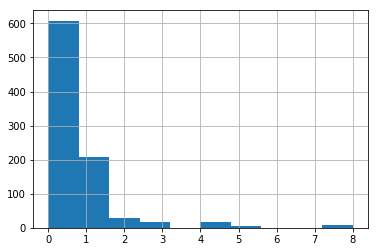

In [62]:
train["SibSp"].hist()
plt.show()

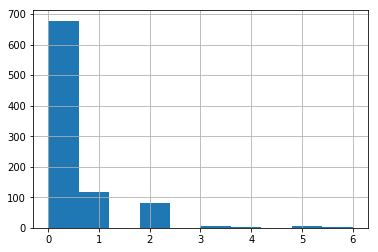

In [63]:
train["Parch"].hist()
plt.show()

In [64]:
sex_pivot = train.pivot_table(index = "Sex", values = "Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


In [65]:
sibsp_pivot = train.pivot_table(index = "SibSp", values = "Survived")
sibsp_pivot

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [66]:
sex_sibsp_pivot = train.pivot_table(index = ["SibSp", "Sex"], values = "Survived")
sex_sibsp_pivot

Survived
SibSp Sex             
0     female  0.787356
      male    0.168203
1     female  0.754717
      male    0.310680
2     female  0.769231
      male    0.200000
3     female  0.363636
      male    0.000000
4     female  0.333333
      male    0.083333
5     female  0.000000
      male    0.000000
8     female  0.000000
      male    0.000000

In [67]:
parch_pivot = train.pivot_table(index = "Parch", values = "Survived")
parch_pivot

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [68]:
sex_parch_pivot = train.pivot_table(index = ["Parch", "Sex"], values = "Survived")
sex_parch_pivot

Survived
Parch Sex             
0     female  0.788660
      male    0.165289
1     female  0.766667
      male    0.327586
2     female  0.612245
      male    0.322581
3     female  0.750000
      male    0.000000
4     female  0.000000
      male    0.000000
5     female  0.250000
      male    0.000000
6     female  0.000000

In [69]:
def family_members(df):
    df["family_members"] = df["SibSp"] + df["Parch"]
    return(df)

In [70]:
train = family_members(train)
holdout = family_members(holdout)

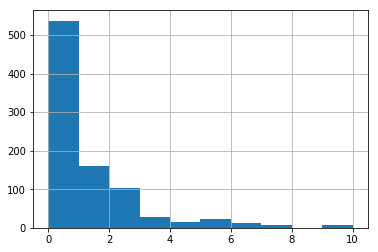

In [71]:
train["family_members"].hist()
plt.show()

In [72]:
family_pivot = train.pivot_table(index = "family_members", values = "Survived")
family_pivot

,Survived
family_members,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [73]:
family_sex_pivot = train.pivot_table(index = ["family_members", "Sex"], values = "Survived")
family_sex_pivot

Survived
family_members Sex             
0              female  0.785714
               male    0.155718
1              female  0.816092
               male    0.243243
2              female  0.775510
               male    0.396226
3              female  0.842105
               male    0.500000
4              female  0.250000
               male    0.000000
5              female  0.375000
               male    0.000000
6              female  0.375000
               male    0.250000
7              female  0.000000
               male    0.000000
10             female  0.000000
               male    0.000000

In [74]:
fam_sex = train.groupby(["family_members", "Sex"])
fam_sex.describe().iloc[:, 0]

family_members  Sex   
0               female    126.0
                male      411.0
1               female     87.0
                male       74.0
2               female     49.0
                male       53.0
3               female     19.0
                male       10.0
4               female     12.0
                male        3.0
5               female      8.0
                male       14.0
6               female      8.0
                male        4.0
7               female      2.0
                male        4.0
10              female      3.0
                male        4.0
Name: (Age, count), dtype: float64

From the sex_pivot table, we can see that the chances of surviving as a woman were 74.2%, and the chances of surviving as a man were 18.9%. When we look at the SibSp and Parch columns, we're looking to see whether the number of siblings, spouses, children, and parents one had on board were likely to affect their chances of survival. After exploring the data, several interesting trends emerge.

From the sibsp_pivot and sex_sibsp_pivot tables, we can see that if you were an unmarried woman with no siblings travelling with you, you were more likely to survive than the average woman. Conversely, if you were a bachelor with no siblings travelling with you, you were less likely to survive than the average man. These odds improve, however, for men with 1 sibling or spouse, and improve more so for men with 2 siblings/spouses. Women in these categories were also more likely to survive than the average woman.

These numbers change drastically for individuals with 3 or more siblings/spouses. Almost no men in these categories survived, and only around 1/3 of women in these categories survived. While the sample sizes for these categories are small (see the fam_sex table above), it seems that the number of siblings/spouses and individual had is a good indicator of whether or not they survived.

We see similar trends when looking at the parch_pivot and sex_parch_pivot tables. Individuals with 1, 2, or 3 parents/children were more likely to survive than not. Again, we see single women with no parents or children the most likely category to survive, but men 1 or 2 parents or children were much more likely to survive than the average man - perhaps these were boys (travelling with 1 or both parents), or they were fathers with a responsibility to their child?

As before, these numbers drastically change for men with 3 or more parents/children - no men in this category survived. Perhaps these were men who sacrificed their spot on a lifeboat to ensure the rest of their family could be saved? Similarly, very few women with 4 or more parents/children survived, for the same reason as the men, perhaps?

Lastly, looking at the family_pivot, family_sex_pivot tables, we see that those who are most likely to survive are those with 1, 2, or 3 family members, those with 3 family members, both men and women, the most likely to survive of all groups. Individuals with no family members travelling with them are less likely to survive - again, we see single women being saved over single men. Those individuals with a high number of family members were the least likely to survive. Perhaps this was due to the class these people travelled in. If the assumption that families in the lower classes tended to be bigger is correct, then this may be an indicator that those in the higher classes were more likely to survive than those in the lower classes. In this case, survival rate would be correlated with ticket class, which would be correlated also with family size.

In any case, in order to capture this difference in our models, we'll add three new columns to group passengers by the number of family members they had. We'll actually classify passengers as one of four categories: single, one_companion, two_companion, and three_plus_companions, but in order to prevent collinearity, we won't include the fourth column in our database, as it can be inferred from the first three columns.

To avoid collinearity further, we'll also drop the family_members column, the Sex_male column

In [75]:
def process_family_members(df):
    cut_points = [-0.5, 0.5, 1.5, 2.5, 1000]
    label_names = ["single", "one_companion", "two_companions", "three_plus"]
    df["family_categories"] = pd.cut(df["family_members"], cut_points, labels = label_names)
    return(df)

In [76]:
train = process_family_members(train)
holdout = process_family_members(holdout)

In [77]:
train = create_dummies(train, "family_categories")
train = train.drop(columns = "family_categories_three_plus")
holdout = create_dummies(holdout, "family_categories")
holdout = holdout.drop(columns = "family_categories_three_plus")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male,family_members,family_categories,family_categories_single,family_categories_one_companion,family_categories_two_companions
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,1,one_companion,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,1,one_companion,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,single,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,1,one_companion,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,0,single,1,0,0


In [82]:
train = train.drop(columns = ["Age_categories", "Fare_categories", "Age_categories_Senior", "Fare_categories_100+", "Sex_male", "family_members", "family_categories"])
holdout = holdout.drop(columns = ["Age_categories", "Fare_categories", "Age_categories_Senior", "Fare_categories_100+", "Sex_male", "family_members", "family_categories"])

Now that we've engineered a new feature, we need to start selecting which features we want to use to train our model. Rather than select them manually, we'll use the feature_selection.RFECV class from scikit-learn, which will recursively eliminate features from our model and then store the features which produced the best model.

As for the model, we'll use a random forest, a model which is routinely one of the best performing in machine learning.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import numpy as np

def select_features(df):
    df = df.select_dtypes([np.number]).dropna(axis =1)
    features = df.drop(["Survived", "PassengerId"], axis = 1)
    target = df["Survived"]
    
    rf = RandomForestClassifier(random_state = 20)
    selector = RFECV(rf, cv = 10)
    selector.fit(features, target)
    
    best_cols = list(features.columns[selector.support_])
    return(best_cols)

In [87]:
best_features = select_features(train)
best_features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Age_categories_Infant',
 'Age_categories_Young Adult',
 'Fare_categories_0-12',
 'Fare_categories_12-50',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Cabin_type_Unknown',
 'Sex_female',
 'family_categories_single',
 'family_categories_two_companions']

Lastly, we need to select which model we're going to use. We'll again create a function to do this, and we'll make use of scikit-learn's GridSearchCV class to try out a number of different models and hyperparameters.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df, features):
    features = df[features]
    target = df["Survived"]
    models = [
        {"name": "LogisticRegression",
         "estimator": LogisticRegression(),
         "hyperparams": {"solver":["newton-cg", "lbfgs", "liblinear"]}
        },
        {"name": "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        "hyperparams": {"n_neighbors": range(1, 20, 2),
                        "weights": ["distance", "uniform"],
                        "algorithm": ["ball_tree", "kd_tree", "brute"],
                        "p": [1, 2]}
        },
        {"name": "RandomForestClassifier",
        "estimator": RandomForestClassifier(random_state = 20),
        "hyperparams": {"n_estimators": [4, 6, 9],
                        "criterion": ["entropy", "gini"],
                        "max_depth": [2, 5, 10],
                        "max_features": ["log2", "sqrt"],
                        "min_samples_leaf": [1, 5, 8],
                        "min_samples_split": [2, 3, 5]}
        }
    ]
    
    for model in models:
        print(model["name"])
        print("-"*len(model["name"]))
        
        grid = GridSearchCV(model["estimator"],
                            param_grid = model["hyperparams"],
                           cv = 10)
        grid.fit(features, target)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        
        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
        
    return(models)

In [98]:
models = select_model(train, best_features)
best_model = models[2]["best_model"]

LogisticRegression
------------------
Best Score: 0.8159371492704826
Best Parameters: {'solver': 'lbfgs'}

KNeighborsClassifier
--------------------
Best Score: 0.7665544332210998
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.8406285072951739
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}



Now all we need to do is make our submission to Kaggle! We can write a function to get our results into the required form to submit.

In [104]:
def create_submission_file(model, features, filename = "submission.csv"):
    holdout_features = holdout[features]
    predictions = model.predict(holdout_features)
    
    submission = {"PassengerId": holdout["PassengerId"], "Survived": predictions}
    submission_df = pd.DataFrame(submission)
    submission_df.to_csv(filename, index = False)

In [99]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [109]:
final_file = create_submission_file(best_model, best_features)